In [29]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
  

In [3]:
#load data set
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding="ISO-8859-1")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [20]:
df.groupby(axis=0,level=0)

In [4]:
df2=pd.read_excel(r'file:///C:\Users\anand\Downloads\Country-Code%20(1).xlsx')

In [5]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [21]:
#merge both dataframe
df3=pd.merge(df,df2)

In [24]:
df3.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [27]:
df3.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
7707,3072,Hawkers,1,New Delhi,"B-1, Vasant Kunj, New Delhi",Vasant Kunj,"Vasant Kunj, New Delhi",77.157316,28.523209,Chinese,...,No,Yes,No,No,2,3.4,Orange,Average,398,India


In [28]:
#dataframe info
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [30]:
type(df3)

pandas.core.frame.DataFrame

In [31]:
df3.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [32]:
type(df3.columns)

pandas.core.indexes.base.Index

## Check duplicates:

In [33]:
df3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

In [34]:
df3.duplicated().sum().sum()

0

##### No duplicates are present

## Check null values:

In [35]:
df3.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

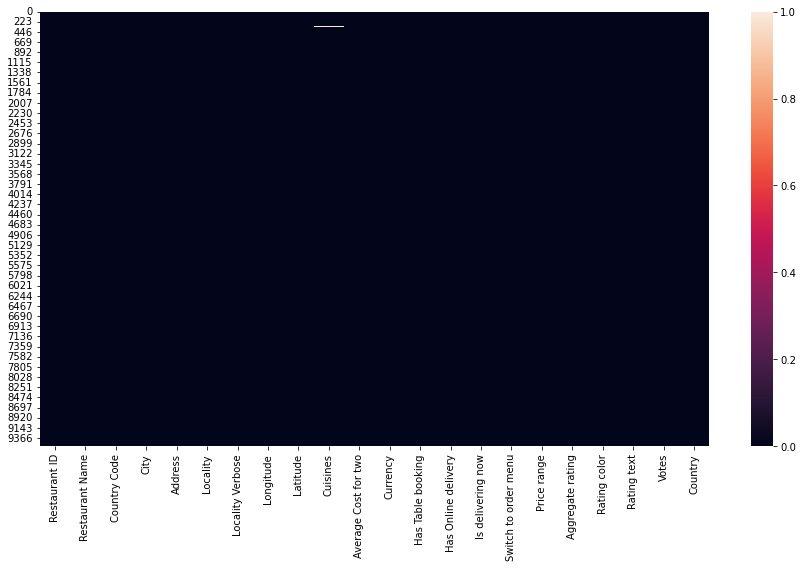

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df3.isnull())

##### heatmap shows the null values in one column

In [39]:
df3.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

##### column cuisines shows the null values.

## Imputation:

In [40]:
df3['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [42]:
df3['Cuisines'].count()

9542

In [46]:
#droping the rows which having null values
df=df3.dropna(axis=0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

## Visualisation:

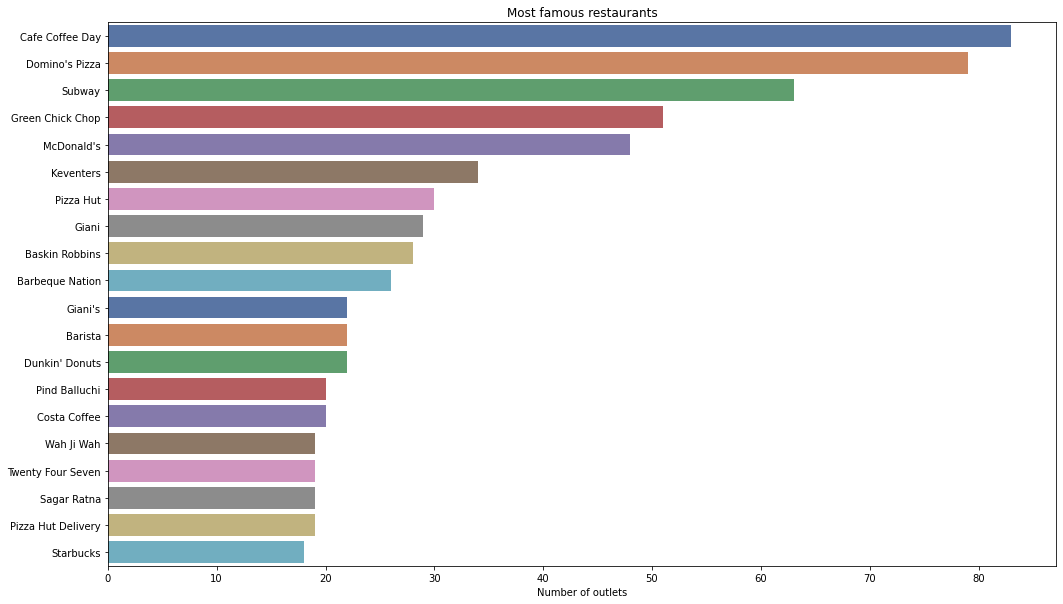

In [62]:
plt.figure(figsize=(17,10))
chains=df['Restaurant Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants")
plt.xlabel("Number of outlets")
plt.show()

In [50]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Athens', 'Augusta', 'Boise', 'Cedar Rapids/Iowa City',
       'Clatskanie', 'Cochrane', 'Columbus', 'Dalton', 'Davenport',
       'Des Moines', 'Dubuque', 'Fernley', 'Gainesville', 'Lakeview',
       'Lincoln', 'Macon', 'Mc Millan', 'Monroe', 'Ojo Caliente',
       'Orlando', 'Pensacola', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Sioux City', 'Tampa Bay',
       'Valdosta', 'Vernonia', 'Waterloo', 'Weirton', 'Winchester Bay',
       'Armidale', 'Balingup', 'Beechworth', 'Dicky Beach',
       'East Ballina', 'Flaxton', 'Forrest', 'Hepburn Springs',
       'Huskisson', 'Inverloch', 'Lakes Entrance', 'Lorn', 'Macedon',
       'Mayfield', 'Middleton Beach', 'Montville', 'Palm Cove',
       'Paynesville', 'Penola', 'Phillip Island', 'Tan

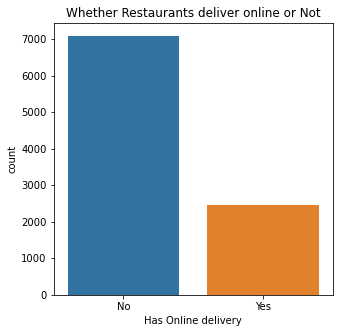

In [57]:
#Restaurants delivering Online or not
sns.countplot(df['Has Online delivery'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

##### """Most of the online restaurant not prefer online delivery"""

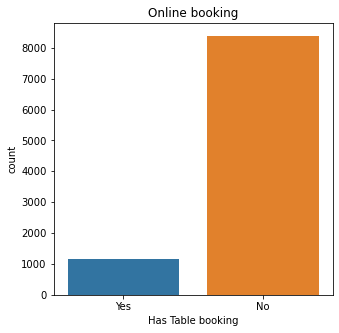

In [55]:
sns.countplot(df['Has Table booking'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Online booking')
plt.show()

## Distributions:

<AxesSubplot:xlabel='Aggregate rating', ylabel='Density'>

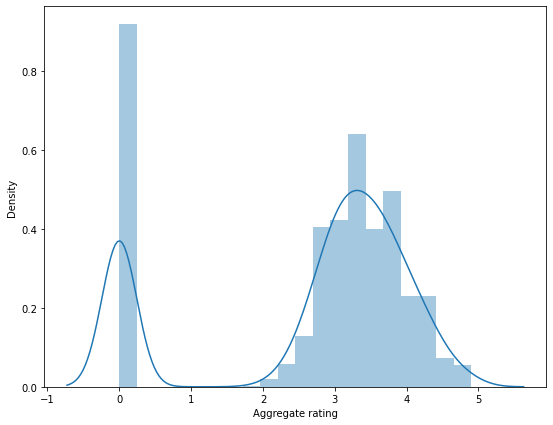

In [59]:
#How ratings are distributed
plt.figure(figsize=(9,7))

sns.distplot(df['Aggregate rating'],bins=20)

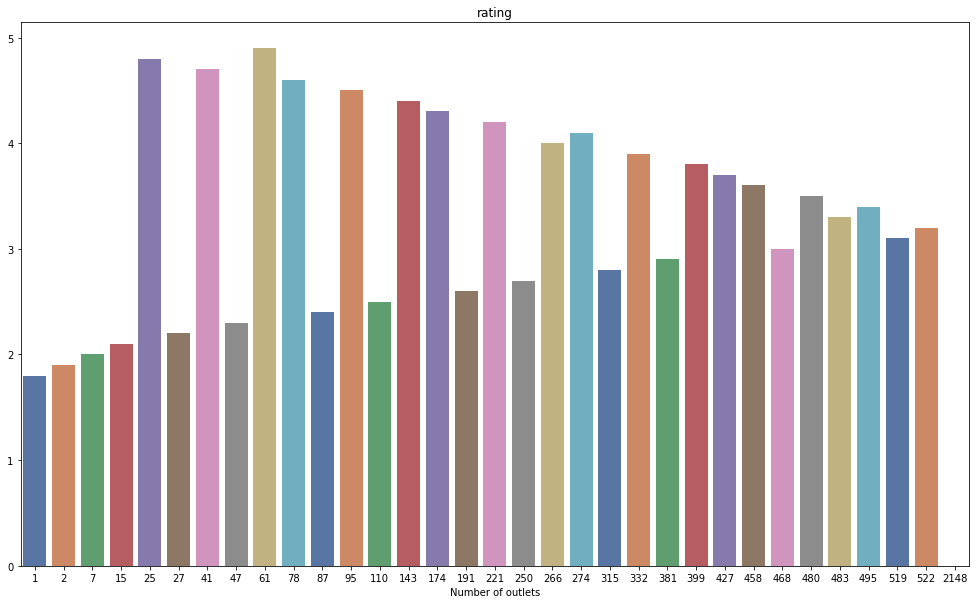

In [61]:
plt.figure(figsize=(17,10))
chains=df['Aggregate rating'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("rating")
plt.xlabel("Number of outlets")
plt.show()

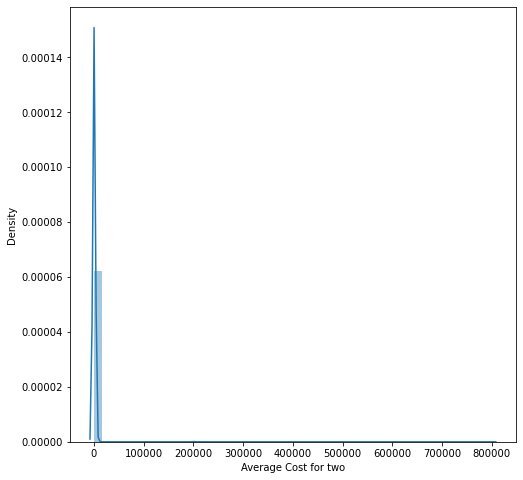

In [65]:
plt.figure(figsize=(8,8))
sns.distplot(df['Average Cost for two'])
plt.show()

##### data is skewed

Text(0.5, 0, 'Number of outlets')

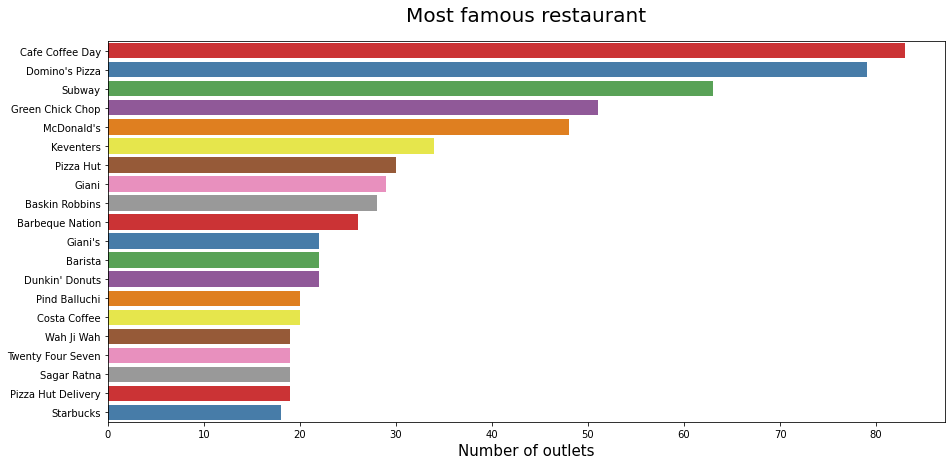

In [66]:
plt.figure(figsize=(15,7))
chains=df['Restaurant Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

#### Cafe coffe day and dominos pizza are the most famous restaurant

## Building Our Model:

## Encoding:
Convert the online categorical variables into a numeric format

In [67]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [80]:
df.drop(['Address'],axis=1,inplace=True)


In [83]:


df.drop(['Rating color'],axis=1,inplace=True)
df.drop(['Rating text'],axis=1,inplace=True)

In [72]:
df['Has Online delivery'].replace('Yes',1,inplace=True)
df['Has Online delivery'].replace('No',0,inplace=True)
df['Is delivering now'].replace('Yes',1,inplace=True)
df['Is delivering now'].replace('No',0,inplace=True)

In [71]:
df['Switch to order menu'].replace('Yes',1,inplace=True)
df['Switch to order menu'].replace('No',0,inplace=True)
df['Has Table booking'].replace('Yes',1,inplace=True)
df['Has Table booking'].replace('No',0,inplace=True)

In [74]:
df['Has Online delivery'].unique()

array([0, 1], dtype=int64)

In [73]:
df['Is delivering now'].unique()

array([0, 1], dtype=int64)

In [75]:
df['Switch to order menu'].unique()

array([0], dtype=int64)

In [76]:
df['Has Table booking'].unique()

array([1, 0], dtype=int64)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Locality              9542 non-null   object 
 5   Longitude             9542 non-null   float64
 6   Latitude              9542 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9542 non-null   int64  
 9   Currency              9542 non-null   object 
 10  Has Table booking     9542 non-null   int64  
 11  Has Online delivery   9542 non-null   int64  
 12  Is delivering now     9542 non-null   int64  
 13  Switch to order menu  9542 non-null   int64  
 14  Price range           9542 non-null   int64  
 15  Aggregate rating     

In [85]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [86]:
df['Restaurant Name']= label_encoder.fit_transform(df['Restaurant Name'])
df['City']= label_encoder.fit_transform(df['City'])
df['Locality']= label_encoder.fit_transform(df['Locality'])
df['Cuisines']= label_encoder.fit_transform(df['Cuisines'])
df['Currency']= label_encoder.fit_transform(df['Currency'])
df['Country']= label_encoder.fit_transform(df['Country'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   int32  
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   int32  
 4   Locality              9542 non-null   int32  
 5   Longitude             9542 non-null   float64
 6   Latitude              9542 non-null   float64
 7   Cuisines              9542 non-null   int32  
 8   Average Cost for two  9542 non-null   int64  
 9   Currency              9542 non-null   int32  
 10  Has Table booking     9542 non-null   int64  
 11  Has Online delivery   9542 non-null   int64  
 12  Is delivering now     9542 non-null   int64  
 13  Switch to order menu  9542 non-null   int64  
 14  Price range           9542 non-null   int64  
 15  Aggregate rating     

In [88]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Country
0,6317637,3743,162,73,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,314,6
1,6304287,3168,162,73,592,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,591,6
2,6300002,2893,162,75,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,270,6
3,6318506,4700,162,75,860,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,365,6
4,6314302,5515,162,75,860,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4436,208,139,516,28.977392,41.022793,1813,80,11,0,0,0,0,3,4.1,788,11
9547,5908749,1311,208,139,551,29.041297,41.009847,1824,105,11,0,0,0,0,3,4.2,1034,11
9548,5915807,3064,208,139,553,29.034640,41.055817,1110,170,11,0,0,0,0,4,3.7,661,11
9549,5916112,513,208,139,553,29.036019,41.057979,1657,120,11,0,0,0,0,4,4.0,901,11


### set the variable:

In [89]:
x=df.drop(columns=['Average Cost for two'],axis=1)
y=df['Average Cost for two']


In [91]:
x.shape,y.shape

((9542, 17), (9542,))

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

## Adaboost regressor:

In [106]:
ada=AdaBoostRegressor()
ada.fit(x_test,y_test)
y_pred=ada.predict(x_test)
y_pred.shape

(2863,)

In [107]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.9931709328951912


## linear regressor:

In [95]:
LR=LinearRegression()
LR.fit(x_test,y_test)
y_pred=LR.predict(x_test)
y_pred.shape

(2863,)

In [96]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.05508597765412415


## Random Forest:

In [97]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.5824331457603822

In [98]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5494987016399244

## AdaboostRegressor gives us the best model with r2 score 0.9959222331249283

In [104]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(ada, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

### predicting price range

In [110]:
X=df.drop(columns=['Price range'],axis=1)
Y=df['Price range']

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=10)

## adaboostregressor:

In [112]:
Ada=AdaBoostRegressor()
Ada.fit(X_test,Y_test)
Y_pred=ada.predict(X_test)
Y_pred.shape

(2863,)

In [113]:

accuracy=metrics.r2_score(Y_test,Y_pred)
print('R square score',accuracy)

R square score -316651050.8331702


## linearregressor:

In [115]:
Lr=LinearRegression()
Lr.fit(X_test,Y_test)
_pred=LR.predict(X_test)
_pred.shape

(2863,)

In [117]:
accuracy=metrics.r2_score(Y_test,_pred)
print('R square score',accuracy)

R square score -40787626856467.266


## Extra Tree Regression:

In [118]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET=ExtraTreesRegressor(n_estimators = 120)
ET.fit(X_train,Y_train)
predict_=ET.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,predict_)

-0.006486735681557221

## RandomForestRegressor:

In [119]:

RF=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF.fit(X_train,Y_train)
y_Predict=RF.predict(X_test)
r2_score(Y_test,y_Predict)

0.9851523844186784

### for price range RandomForestRegressor gives the best model

In [120]:
#Use pickle to save our model so that we can use it later


# Saving model to disk
pickle.dump(RF, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))